# Web安全之机器学习
## 第10章 KMeans算法
### 10.3 示例：使用KMeans算法检测DGA域名

#### 1.数据搜集和数据清洗

加载alexa前100的域名作为白样本，标记为0；分别加载cryptolocker和post-tovar-goz家族的DGA域名，分别标记为2和3.

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def load_dga(file_crypto,file_post):
    x1 = []
    x2 = []
    with open(file_crypto,'r') as f:
        for line in f.readlines():
            x1.append(line.strip().split(',')[0])
    with open(file_post,'r') as f:
        for line in f.readlines():
            x2.append(line.strip().split(',')[0])
    return x1,x2

def load_alexa(filename):
    x3 =[]
    with open(filename,'r') as f:
        for line in f.readlines():
            x3.append(line.strip().split(',')[1])
    return x3

#### 2.特征化
使用2-gram分隔域名，切割单元为字符。进行向量化处理。

In [3]:
def get_feature():
    x1,x2 = load_dga("../data/dga/dga-cryptolocke-50.txt","../data/dga/dga-post-tovar-goz-50.txt")
    x3 = load_alexa("../data/dga/top-50.csv")
    
    y1 = [2]*len(x1)
    y2 = [3]*len(x2)
    y3 = [0] * len(x3)
    
    x = x1+x2+x3
    y = y1+y2+y3
    
    cv = CountVectorizer(decode_error='ignore',ngram_range=(2,2),token_pattern="\w")
    X = cv.fit_transform(x).toarray()
    return X,y

#### 3.训练样本

In [4]:
X,Y = get_feature()

model = KMeans(n_clusters=2)
Y_pred = model.fit_predict(X)

#### 4.效果验证
使用TSNE将高维向量降维，便于作图。

In [5]:
tsne = TSNE(learning_rate=100)
x = tsne.fit_transform(X)

可视化，DGA域名使用符号"x"标识

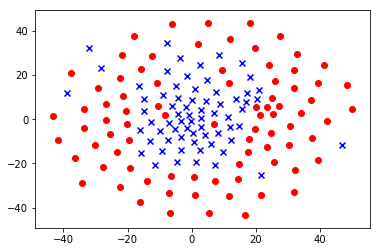

In [6]:
for i,label in enumerate(x):
    x1,x2 = x[i]
    if Y_pred[i] == 1:
        plt.scatter(x1,x2,marker='o',color = 'r')
    else:
        plt.scatter(x1,x2,marker='x',color='b')
plt.show()